Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 1001, 1301)
numOfArrays:  25
shape:  (1001, 1301)


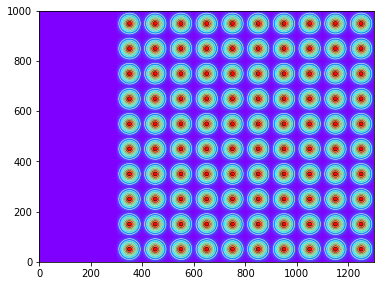

In [43]:
## plot plasma density

%pylab inline
import numpy as np
from matplotlib import pyplot as plt

from ReadBinary import *

filename = "../data/Wp2-x.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

Wp2 = GetArrays(filename, 0, 1)[0,0,:,:]
print("shape: ", Wp2.shape)

shape = Wp2.shape

plt.figure(figsize=(6, 6*(shape[0]/shape[1])))
plt.imshow(np.real(Wp2[:,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.contour(np.real(Wp2[:,:]), cmap="Greys", linewidths=0.5)
plt.show()


Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 1001, 1301)
numOfArrays:  241
shape:  (241, 1001, 1301)


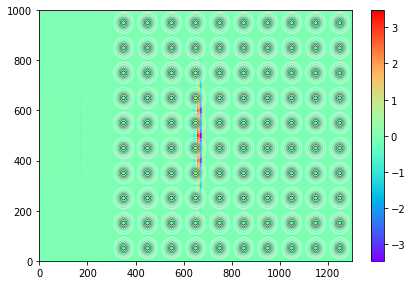

In [50]:
## animate Electric field

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
from ReadBinary import *

filename = "../data/E-x.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename, indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

shape = E.shape[1:]

plt.ion()
plt.figure(figsize=(7,6*(shape[0]/shape[1])))

for n in range(E.shape[0]):
    plt.clf()
    plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
    plt.colorbar()
    plt.contour(np.real(Wp2[:,:]), cmap="Greys", linewidths=0.5)
    plt.pause(0.05)

Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


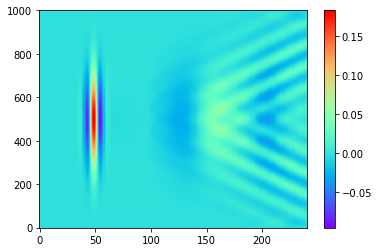

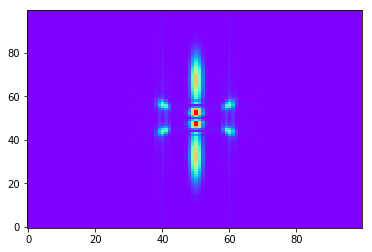

In [51]:
%pylab inline
E_ty = E[:, :, 200]

plt.imshow(np.real(E_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

Nt, Ny = E_ty.shape
N_pts = 50
E_f_ty = np.fft.fftshift(np.fft.fft2(E_ty))[Nt//2-N_pts:Nt//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]

plt.imshow(np.abs(E_f_ty), cmap="rainbow", origin='lower', aspect='auto')
plt.show()


Populating the interactive namespace from numpy and matplotlib


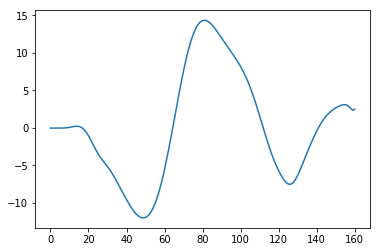

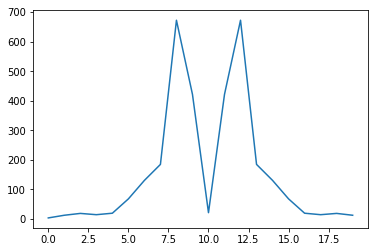

In [56]:
%pylab inline

plt.figure()
E_t = np.sum(E_ty, axis=1)[80:]
plt.plot(E_t)
plt.show()

Nt = len(E_t)
N_pts = 10

plt.figure()
E_f_t = np.fft.fftshift(np.fft.fft(E_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(E_f_t))
plt.show()
